In [18]:
#!git clone https://github.com/onurerdog4n/ageGenderTest.git

Cloning into 'ageGenderTest'...
remote: Enumerating objects: 4913, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 4913 (delta 79), reused 145 (delta 79), pack-reused 4768
Receiving objects: 100% (4913/4913), 179.08 MiB | 30.59 MiB/s, done.
Resolving deltas: 100% (108/108), done.
Checking out files: 100% (7136/7136), done.


In [19]:
#!pip install deepface
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

In [20]:
from deepface import DeepFace

In [21]:
%ls ageGenderTest
%cd ageGenderTest

deep-learning/  testData/  unluData/
/content/ageGenderTest/ageGenderTest


# **FOTOĞRAF ÇEK**

In [22]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


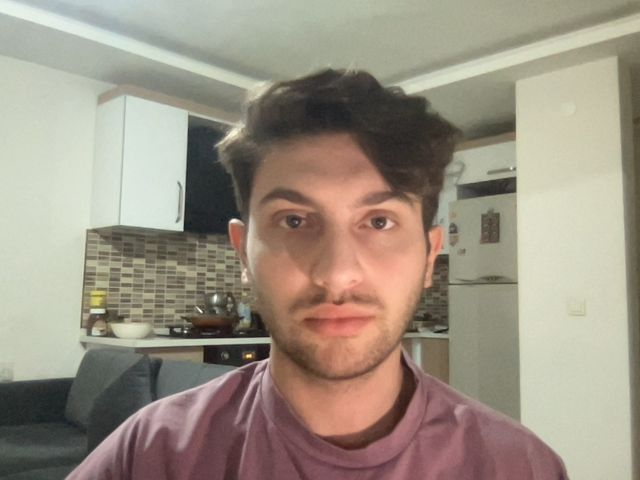

In [40]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  display(Image(filename))
except Exception as err:
  print(str(err))

In [41]:
#Fotoğraf Seç
img1_path = "photo.jpg"

In [42]:
#Fotoğrafı Analiz Et
demography = DeepFace.analyze(img1_path)
print("")
#print("Yaş: ", demography["age"])
print("Cinsiyet: ", demography["gender"])
#print("Milliyet: ", demography["dominant_race"])

cinsiyet = demography["gender"]
#milliyet = demography["dominant_race"]

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]


Cinsiyet:  Man


# **CİNSİYETE GÖRE BENZER ÜNLÜYÜ BULMA**

***Dataset Oluşturma***

In [43]:
benzerlik = 999999
benzerfoto = 0
unluadi = 0
bosliste = []
list = ["AamirKhan", "AdamSandler", "AkshayKumar", "AmitabhBachchan", "AntonioBanderas", "ArnoldSchwarzenegger", "BarrackObama", "ChristianBale", "CristianoRonaldo", "JustinBieber", "LeonardoDiCaprio", "LionelMessi", "Neymar", "RobertDowneyJR", "TimAllen", "TomCruise", "UsainBolt", "WillSmith", "OnurErdogan"]
listkadin = ["AlexandraDaddario", "AmandaSeyfried", "AmberHeard", "AmyAdams", "AnneHathaway", "BlakeLively", "CourteneyCox", "EmmaStone", "EmmaWatson", "EvaMendes", "HalleBerry", "JenniferAniston", "JenniferLawrence", "JessicaAlba", "JodieFoster", "JuliaRoberts", "KateHudson", "MerylStreep", "MilaKunis", "ScarlettJohansson"]


if cinsiyet == "Man":
  for i in list:
    unluadi = i
    for say in range(1,2):
      #dosya uzantısı olusturma
      globals()[f"dosyaadi"] = f"testData/unluData/erkek/{unluadi}/{unluadi}{say}.jpg"
      #array donuştür
      bosliste.append(dosyaadi)
    
  for i in bosliste:
    img2_path = i
    resultnew = DeepFace.verify(img1_path, img2_path, enforce_detection=False, model_name = "VGG-Face", distance_metric = "cosine")
    distancenew = resultnew["distance"]

    if distancenew < benzerlik:
      benzerlik = resultnew["distance"]
      benzerfoto = img2_path
    else:
      benzerlik = benzerlik

  print("Sonuç")
  print(benzerfoto)
  print(benzerlik)
else:
  for i in listkadin:
    unluadi = i
    for say in range(1,3):
      #dosya uzantısı olusturma
      globals()[f"dosyaadi"] = f"testData/unluData/erkek/{unluadi}/{unluadi}{say}.jpg"
      #array donuştür
      bosliste.append(dosyaadi)
    
  for i in bosliste:
    img2_path = i
    resultnew = DeepFace.verify(img1_path, img2_path, enforce_detection=False, model_name = "VGG-Face", distance_metric = "cosine")
    distancenew = resultnew["distance"]

    if distancenew < benzerlik:
      benzerlik = resultnew["distance"]
      benzerfoto = img2_path
    else:
      benzerlik = benzerlik
  print("Sonuç")
  print(benzerfoto)
  print(benzerlik)

Sonuç
testData/unluData/erkek/OnurErdogan/OnurErdogan1.jpg
0.14778575652836645
